In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("with_otec/prog.nc")
ini = xr.open_dataset("with_otec/MOM_IC.nc")

Initial depths: [[    0.           -95.23809524  -190.47619048  -285.71428571
   -380.95238095  -476.19047619  -571.42857143  -666.66666667
   -761.9047619   -857.14285714  -952.38095238 -1047.61904762
  -1142.85714286 -1238.0952381  -1333.33333333 -1428.57142857
  -1523.80952381 -1619.04761905 -1714.28571429 -1809.52380952
  -1904.76190476 -2000.         -2095.23809524 -2190.47619048
  -2285.71428571 -2380.95238095 -2476.19047619 -2571.42857143
  -2666.66666667 -2761.9047619  -2857.14285714 -2952.38095238
  -3047.61904762 -3142.85714286 -3238.0952381  -3333.33333333
  -3428.57142857 -3523.80952381 -3619.04761905 -3714.28571429
  -3809.52380952 -3904.76190476 -4000.         -4095.23809524
  -4190.47619048 -4285.71428571 -4380.95238095 -4476.19047619
  -4571.42857143 -4666.66666667 -4761.9047619  -4857.14285714
  -4952.38095238 -5047.61904762 -5142.85714286 -5238.0952381
  -5333.33333333 -5428.57142857 -5523.80952381 -5619.04761905
  -5714.28571429 -5809.52380952 -5904.76190476 -6000.  

Text(0, 0.5, 'Interface Height (m)')

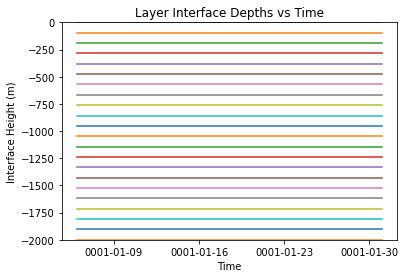

In [3]:
# Graph the depth of each layer over time
print('Initial depths:', ini['eta'].mean(['lath', 'lonh']).data)
e = ds['e'].mean(['yh', 'xh'])
for z in ds['zi']:
    e.sel(zi=z).plot()
    
plt.ylim(-2000, 0)
plt.title("Layer Interface Depths vs Time")
plt.ylabel("Interface Height (m)")
    
# Reverse engineer the value of w_otec.
#print('w_otec=', (e[0,0] - e[1,0])/(5*24*3600))

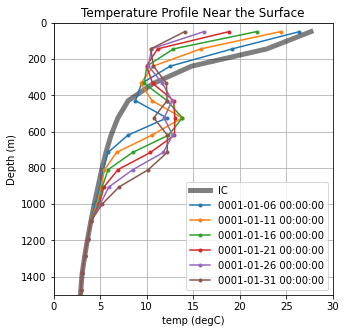

In [13]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(1500, 0)
plt.xlim(0, 30)
plt.title("Temperature Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend()

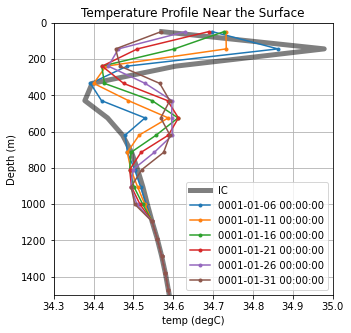

In [12]:
plt.figure(figsize=(5,5))

ini['Salt'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time']:
    ds['salt'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(1500, 0)
plt.xlim(34.3, 35.0)
plt.title("Temperature Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend()

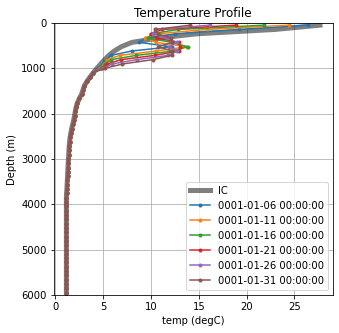

In [8]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(6000, 0)
plt.title("Temperature Profile")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend()